<a href="https://colab.research.google.com/github/ridafathima451/Aadhaar-Pulse-Project/blob/main/AadhaarPulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries loaded successfully")

All libraries loaded successfully


In [ ]:
import zipfile

zip_path = "aadhaar demographic updates.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("enrollment_data")

print("Enrollment ZIP extracted successfully")

Enrollment ZIP extracted successfully


In [ ]:
import os

os.listdir("enrollment_data")

['api_data_aadhar_demographic']

In [ ]:
os.listdir("enrollment_data/api_data_aadhar_demographic")

['api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv',
 'api_data_aadhar_demographic_0_500000.csv']

In [ ]:
file_path = "enrollment_data/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv"

df = pd.read_csv(file_path)

print("CSV loaded successfully")

CSV loaded successfully


In [ ]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:
df.shape

(500000, 6)

In [ ]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [ ]:
df["total_enrollment"] = (
    df["demo_age_5_17"] + df["demo_age_17_"]
)

df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,total_enrollment
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,578
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,397
2,01-03-2025,Gujarat,Rajkot,360006,65,765,830
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,338
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,830


In [ ]:
state_enrollment = df.groupby("state")["total_enrollment"].sum().sort_values(ascending=False)

state_enrollment.head(10)

,total_enrollment
state,
Uttar Pradesh,2425595
Bihar,1352480
Maharashtra,1298657
West Bengal,1148832
Madhya Pradesh,923439
Rajasthan,881210
Andhra Pradesh,651751
Tamil Nadu,603481
Chhattisgarh,593671


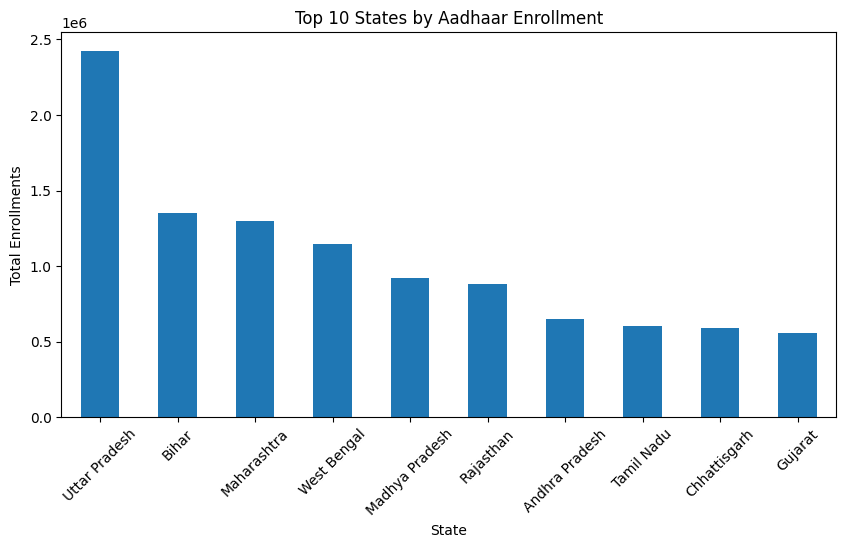

In [ ]:
plt.figure(figsize=(10,5))
state_enrollment.head(10).plot(kind="bar")
plt.title("Top 10 States by Aadhaar Enrollment")
plt.ylabel("Total Enrollments")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

In [ ]:
age_state = df.groupby("state")[["demo_age_5_17", "demo_age_17_"]].sum()

age_state.head()

,demo_age_5_17,demo_age_17_
state,,
Andaman & Nicobar Islands,6,253
Andaman and Nicobar Islands,128,1270
Andhra Pradesh,87559,564192
Arunachal Pradesh,1599,8283
Assam,23582,251714


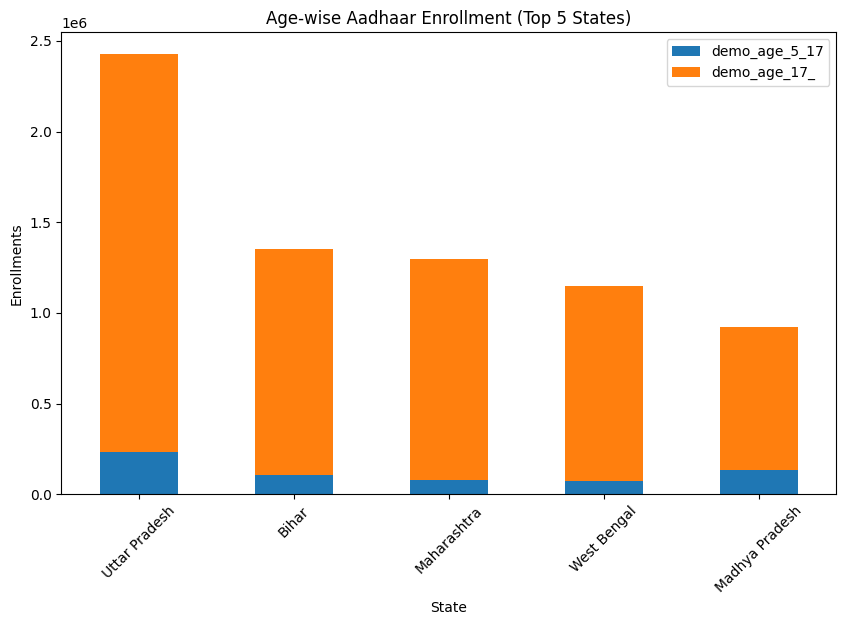

In [ ]:
age_state_top5 = age_state.loc[state_enrollment.head(5).index]

age_state_top5.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Age-wise Aadhaar Enrollment (Top 5 States)")
plt.xlabel("State")
plt.ylabel("Enrollments")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Remove rows where state is not text
df = df[df["state"].apply(lambda x: isinstance(x, str))]

# Standardize state names
df["state"] = df["state"].str.strip()
df["state"] = df["state"].replace({
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands"
})

In [ ]:
df.groupby("state")[["demo_age_5_17", "demo_age_17_"]].sum().head()

,demo_age_5_17,demo_age_17_
state,,
Andaman and Nicobar Islands,134,1523
Andhra Pradesh,87559,564192
Arunachal Pradesh,1599,8283
Assam,23582,251714
Bihar,104773,1247707


In [ ]:
district_enrollment = (
    df.groupby(["state", "district"])["total_enrollment"]
    .sum()
    .reset_index()
    .sort_values(by="total_enrollment", ascending=False)
)

district_enrollment.head(10)


,state,district,total_enrollment
219,Delhi,North West Delhi,137575
261,Gujarat,Surat,135755
1020,West Bengal,South 24 Parganas,132429
548,Maharashtra,Thane,129758
539,Maharashtra,Pune,125331
1007,West Bengal,Murshidabad,113214
224,Delhi,West Delhi,103680
742,Rajasthan,Jaipur,96979
1026,West Bengal,Uttar Dinajpur,91052
379,Karnataka,Bengaluru,90722


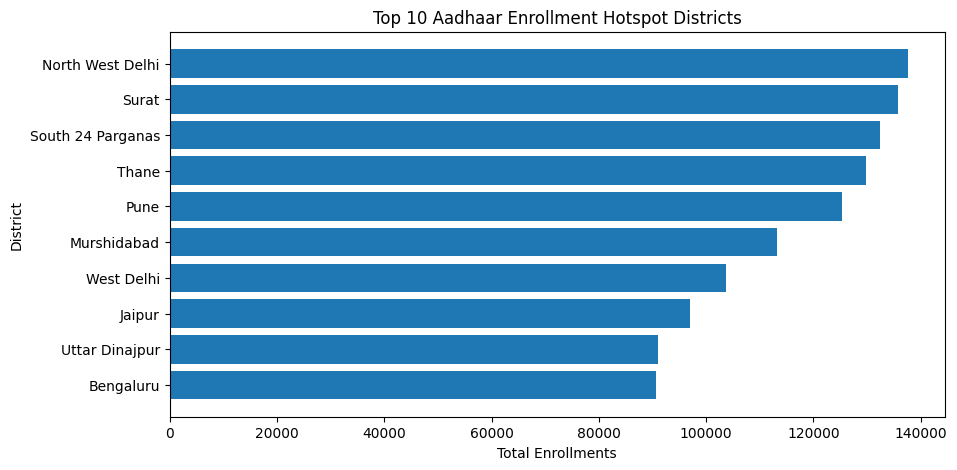

In [ ]:
top_districts = district_enrollment.head(10)

plt.figure(figsize=(10,5))
plt.barh(
    top_districts["district"],
    top_districts["total_enrollment"]
)
plt.xlabel("Total Enrollments")
plt.ylabel("District")
plt.title("Top 10 Aadhaar Enrollment Hotspot Districts")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
low_districts = district_enrollment.tail(10)

low_districts

,state,district,total_enrollment
517,Maharashtra,Dist : Thane,1
1031,West Bengli,Hooghly,1
1024,West Bengal,South DumDum(M),1
312,Jammu & Kashmir,Rajauri,1
877,Uttar Pradesh,Baghpat *,1
677,Orissa,Nuapada,1
667,Orissa,Kalahandi,1
659,Orissa,Debagarh,1
978,West Bengal,Bally Jagachha,1
615,Odisha,Balianta,1


In [ ]:
pincode_enrollment = (
    df.groupby("pincode")["total_enrollment"]
    .sum()
    .reset_index()
    .sort_values(by="total_enrollment", ascending=False)
)

pincode_enrollment.head(10)

,pincode,total_enrollment
90,110094,51305
57,110059,47212
2668,244001,45451
3575,283203,43052
82,110086,42136
1633,202001,32403
40,110041,29752
1612,201102,29724
96,121004,28913
5556,395006,27050


In [ ]:
pincode_enrollment.tail(10)

,pincode,total_enrollment
5164,384445,1
17708,784185,1
15893,731253,1
10572,571502,1
5182,385506,1
1061,173230,1
14339,682029,1
2072,221113,1
9133,516005,1
18623,813214,1


In [ ]:
# Aggregate district-wise age data
district_age = (
    df.groupby(["state", "district"])[[
        "demo_age_5_17",
        "demo_age_17_",
        "total_enrollment",
    ]]
    .sum()
    .reset_index()
)

# Add age_0_5 as a placeholder with zeros since it's not in the dataset
district_age["age_0_5"] = 0

# Convert to proportions, using the available and placeholder column names
district_age["p_0_5"] = district_age["age_0_5"] / district_age["total_enrollment"]
district_age["p_5_17"] = district_age["demo_age_5_17"] / district_age["total_enrollment"]
district_age["p_18+"] = district_age["demo_age_17_"] / district_age["total_enrollment"]

district_age.head()

,state,district,demo_age_5_17,demo_age_17_,total_enrollment,age_0_5,p_0_5,p_5_17,p_18+
0,Andaman and Nicobar Islands,Andamans,2,172,174,0,0.0,0.011494,0.988506
1,Andaman and Nicobar Islands,Nicobar,4,60,64,0,0.0,0.062500,0.937500
2,Andaman and Nicobar Islands,Nicobars,0,2,2,0,0.0,0.000000,1.000000
3,Andaman and Nicobar Islands,North And Middle Andaman,44,628,672,0,0.0,0.065476,0.934524
4,Andaman and Nicobar Islands,South Andaman,84,661,745,0,0.0,0.112752,0.887248


In [ ]:
# Ideal equal distribution
ideal = 1 / 3

district_age["imbalance_score"] = (
    abs(district_age["p_0_5"] - ideal) +
    abs(district_age["p_5_17"] - ideal) +
    abs(district_age["p_18+"] - ideal)
)

district_age.sort_values("imbalance_score", ascending=False).head(10)

,state,district,demo_age_5_17,demo_age_17_,total_enrollment,age_0_5,p_0_5,p_5_17,p_18+,imbalance_score
1040,west Bengal,South 24 Parganas,0,5,5,0,0.0,0.0,1.0,1.333333
1024,West Bengal,South DumDum(M),0,1,1,0,0.0,0.0,1.0,1.333333
1022,West Bengal,South 24 parganas,0,4,4,0,0.0,0.0,1.0,1.333333
1021,West Bengal,South 24 pargana,0,2,2,0,0.0,0.0,1.0,1.333333
999,West Bengal,KOLKATA,0,8,8,0,0.0,0.0,1.0,1.333333
1003,West Bengal,MALDA,0,26,26,0,0.0,0.0,1.0,1.333333
1006,West Bengal,Medinipur,0,32,32,0,0.0,0.0,1.0,1.333333
1008,West Bengal,NADIA,0,7,7,0,0.0,0.0,1.0,1.333333
972,WESTBENGAL,HOOGHLY,0,10,10,0,0.0,0.0,1.0,1.333333
971,WEST BENGAL,hooghly,0,2,2,0,0.0,0.0,1.0,1.333333


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

district_age[["enroll_norm", "imbalance_norm"]] = scaler.fit_transform(
    district_age[["total_enrollment", "imbalance_score"]]
)

In [ ]:
district_age["priority_score"] = (
    0.6 * district_age["enroll_norm"] +
    0.4 * district_age["imbalance_norm"]
)

priority_districts = district_age.sort_values(
    "priority_score", ascending=False
)

priority_districts[
    ["state", "district", "total_enrollment", "imbalance_score", "priority_score"]
].head(10)

,state,district,total_enrollment,imbalance_score,priority_score
1020,West Bengal,South 24 Parganas,132429,1.189694,0.891373
261,Gujarat,Surat,135755,1.131367,0.870882
548,Maharashtra,Thane,129758,1.163710,0.864134
539,Maharashtra,Pune,125331,1.171697,0.849619
219,Delhi,North West Delhi,137575,1.077080,0.846248
1007,West Bengal,Murshidabad,113214,1.169520,0.795466
1026,West Bengal,Uttar Dinajpur,91052,1.204638,0.719882
1010,West Bengal,North 24 Parganas,83838,1.231852,0.704749
224,Delhi,West Delhi,103680,1.081481,0.701063
742,Rajasthan,Jaipur,96979,1.119555,0.694682


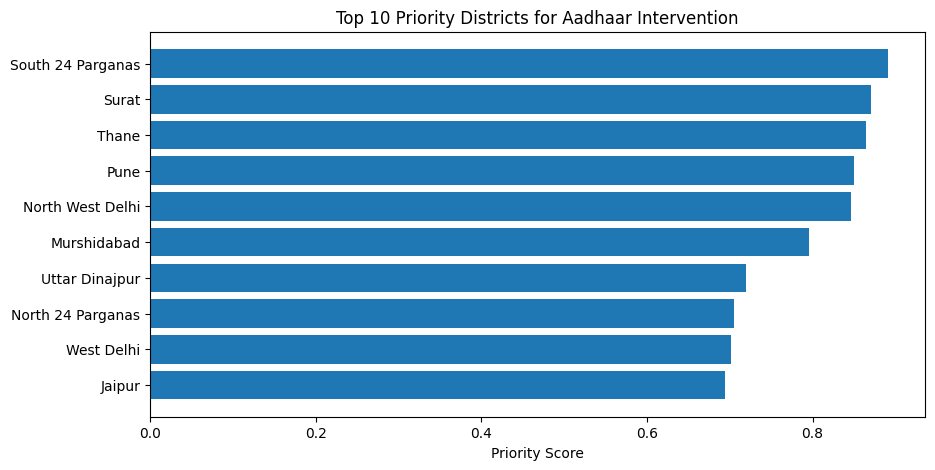

In [ ]:
top_priority = priority_districts.head(10)

plt.figure(figsize=(10,5))
plt.barh(top_priority["district"], top_priority["priority_score"])
plt.title("Top 10 Priority Districts for Aadhaar Intervention")
plt.xlabel("Priority Score")
plt.gca().invert_yaxis()
plt.show()

DASHBOARD

In [ ]:
dashboard_df = priority_districts[
    ["state", "district", "total_enrollment", "imbalance_score", "priority_score"]
].head(20)

dashboard_df

,state,district,total_enrollment,imbalance_score,priority_score
1020,West Bengal,South 24 Parganas,132429,1.189694,0.891373
261,Gujarat,Surat,135755,1.131367,0.870882
548,Maharashtra,Thane,129758,1.163710,0.864134
539,Maharashtra,Pune,125331,1.171697,0.849619
219,Delhi,North West Delhi,137575,1.077080,0.846248
1007,West Bengal,Murshidabad,113214,1.169520,0.795466
1026,West Bengal,Uttar Dinajpur,91052,1.204638,0.719882
1010,West Bengal,North 24 Parganas,83838,1.231852,0.704749
224,Delhi,West Delhi,103680,1.081481,0.701063
742,Rajasthan,Jaipur,96979,1.119555,0.694682


In [ ]:
dashboard_df.to_csv("priority_districts_dashboard.csv", index=False)
print("Dashboard data saved")

Dashboard data saved


In [ ]:
import joblib

# Save the trained model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to linear_regression_model.joblib


In [ ]:
X = priority_districts[['total_enrollment', 'imbalance_score', 'state', 'district']]
y = priority_districts['priority_score']

print("Features (X) and target (y) selected successfully.")

Features (X) and target (y) selected successfully.


In [ ]:
X = pd.get_dummies(X, columns=['state', 'district'], drop_first=True)

print("One-hot encoding applied to 'state' and 'district' columns.")

One-hot encoding applied to 'state' and 'district' columns.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (832, 1013)
Test set shape: (209, 1013)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
import joblib

# Save the trained model to a file
model_filename = 'linear_regression_model.joblib'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to linear_regression_model.joblib


In [ ]:
X = priority_districts[['total_enrollment', 'imbalance_score', 'state', 'district']]
y = priority_districts['priority_score']

print("Features (X) and target (y) selected successfully.")

Features (X) and target (y) selected successfully.


In [ ]:
X = pd.get_dummies(X, columns=['state', 'district'], drop_first=True)

print("One-hot encoding applied to 'state' and 'district' columns.")

One-hot encoding applied to 'state' and 'district' columns.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (832, 1013)
Test set shape: (209, 1013)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R-squared Score: 1.0000


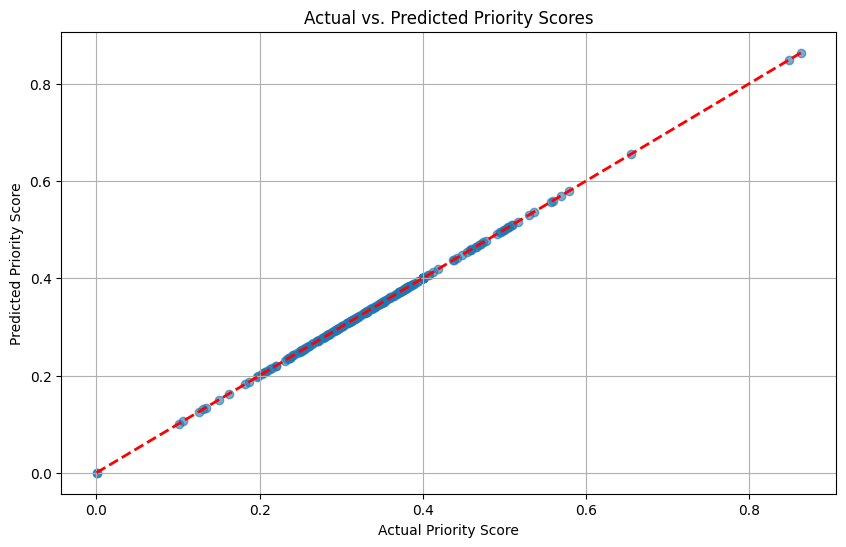

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# 4. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 5. Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

# 6. Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)

# 7. Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

# 8. Add title and labels
plt.title("Actual vs. Predicted Priority Scores")
plt.xlabel("Actual Priority Score")
plt.ylabel("Predicted Priority Score")
plt.grid(True)

# 9. Display the plot
plt.show()